# Steps Involved : Data Exploration, Model Fitting, Best Model Selection, Interpretion

Created by Baojuan Qiao,  2022.07.10

# Data Exploration

In [1]:
from __future__ import print_function 
import os
import numpy as np
from numpy import concatenate
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import seaborn as sns
from math import sqrt


data = pd.read_excel('ColumnACI.xlsx', sheet_name='Database')
data.head()
data['Ag/Ac'] = data['h']*data['h']/data['h/b'] /(data['h']-2*data['cc'])/(data['h']/data['h/b']-2*data['cc'])
data['Ash/sbc'] = data['ρt']*data['h']/data['h/b']/(data['h']/data['h/b']-2*data['cc'])
data.head()
data.describe()

,ID,S,h,h/b,cc,L,L/d,dl,fyl,ρl,...,P/P0,Pd/Agfcd,P/Agfc',θu,Vp1,Vmax1,Vp1/Vo1,θy,Ag/Ac,Ash/sbc
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,...,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,325.000000,498.000000,498.000000
mean,136.905622,0.345382,13.846168,1.074200,0.909608,46.702329,3.934515,0.656843,61444.778250,0.024203,...,0.188548,0.204809,0.204809,3.822724,48.737920,53.854245,0.673721,0.784954,1.416697,0.007096
std,89.473449,0.475971,5.817268,0.267664,0.422306,33.484744,1.936086,0.198633,9019.074137,0.009915,...,0.165634,0.174605,0.174605,2.420180,44.350066,52.092406,0.405409,0.400485,0.296723,0.005672
min,1.000000,0.000000,3.150000,0.500000,0.290000,3.150000,1.153869,0.236220,34800.000000,0.004600,...,0.000000,0.000000,0.000000,0.426720,4.588382,4.284913,0.100089,0.120000,1.072619,0.000414
25%,63.000000,0.000000,9.842520,1.000000,0.512500,23.500000,2.500000,0.500000,54230.000000,0.018225,...,0.078535,0.092872,0.092872,1.976377,20.416325,23.846600,0.370406,0.500000,1.185629,0.002661
50%,125.000000,0.000000,12.007874,1.000000,0.825000,41.251968,3.486658,0.629921,63220.000000,0.022249,...,0.139143,0.158041,0.158041,3.216300,36.619587,41.590248,0.557542,0.700000,1.349330,0.005668
75%,201.750000,1.000000,16.000000,1.000000,1.220000,62.992126,5.000000,0.763787,66055.562000,0.026815,...,0.260566,0.298847,0.298847,5.265612,67.593284,65.873181,0.936864,1.010000,1.520312,0.009742
max,326.000000,1.000000,59.842520,2.006684,2.170000,359.842520,12.500000,1.692913,85122.880030,0.069397,...,0.756821,0.899993,0.899993,15.625000,623.010370,737.793600,2.009741,2.980000,2.713067,0.034669


# Feature Engineering

Ash/sbc     1.000000
ρt          0.980139
ρv          0.682723
fc'         0.560334
P/P0        0.415975
dt          0.412107
ID          0.411899
P           0.393402
P/Agfc'     0.362295
Pd/Agfcd    0.362295
Ag/Ac       0.217613
fyl         0.210522
θu          0.185889
ρl          0.181681
L/d         0.165978
h/b         0.148774
fyt         0.148452
dl          0.014354
θy         -0.017742
Vmax1      -0.043243
cc         -0.047076
L          -0.063216
Vp1        -0.125315
h          -0.279938
S          -0.303374
s          -0.375575
Vp1/Vo1    -0.594004
Name: Ash/sbc, dtype: float64


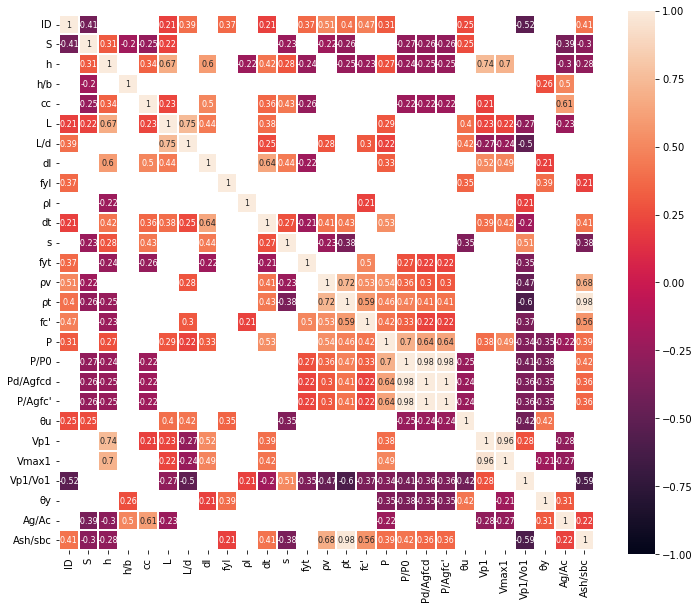

In [2]:
# draw heatmap
corr = data.corr() # examining correlations
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.2) | (corr <= -0.2)], vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
print(corr["Ash/sbc"].sort_values(ascending=False))  


${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)      1.000000
${f_{\rm{c}}^\prime}$ (MPa)          0.560334
${P/A_{\rm{g}}f_{\rm{c}}^\prime}$    0.362295
${A_{\rm{g}}/A_{\rm{c}}}$            0.217613
${f_{\rm{yl}}}$ (MPa)                0.210522
${θ_{\rm{u}}}$ (%)                   0.185889
${ρ_{\rm{l}}}$ (%)                   0.181681
${L/d}$                              0.165978
${h/b}$                              0.148774
${f_{\rm{yt}}}$ (MPa)                0.148452
${d_{\rm{l}}}$ (mm)                  0.014354
${h}$ (m)                           -0.279938
${S}$                               -0.303374
Name: ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%), dtype: float64


,${S}$,${h}$ (m),${h/b}$,${A_{\rm{g}}/A_{\rm{c}}}$,${L/d}$,${d_{\rm{l}}}$ (mm),${f_{\rm{yl}}}$ (MPa),${ρ_{\rm{l}}}$ (%),${f_{\rm{yt}}}$ (MPa),${f_{\rm{c}}^\prime}$ (MPa),${P/A_{\rm{g}}f_{\rm{c}}^\prime}$,${θ_{\rm{u}}}$ (%),${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.345382,0.351693,1.074200,1.416697,3.934515,16.683818,423.646815,2.420284,450.725160,43.082907,0.204809,3.822724,0.709559
std,0.475971,0.147759,0.267664,0.296723,1.936086,5.045266,62.184325,0.991538,185.566463,24.409750,0.174605,2.420180,0.567173
min,0.000000,0.080010,0.500000,1.072619,1.153869,6.000000,239.937544,0.460000,199.947953,13.096591,0.000000,0.426720,0.041391
25%,0.000000,0.250000,1.000000,1.185629,2.500000,12.700000,373.902672,1.822500,351.638321,28.315129,0.092872,1.976377,0.266112
50%,0.000000,0.305000,1.000000,1.349330,3.486658,16.000000,435.886538,2.224927,413.595788,33.591256,0.158041,3.216300,0.566784
75%,1.000000,0.406400,1.000000,1.520312,5.000000,19.400200,455.437048,2.681507,475.769156,41.464207,0.298847,5.265612,0.974202
max,1.000000,1.520000,2.006684,2.713067,12.500000,43.000000,586.901573,6.939707,1423.629425,117.969292,0.899993,15.625000,3.466923


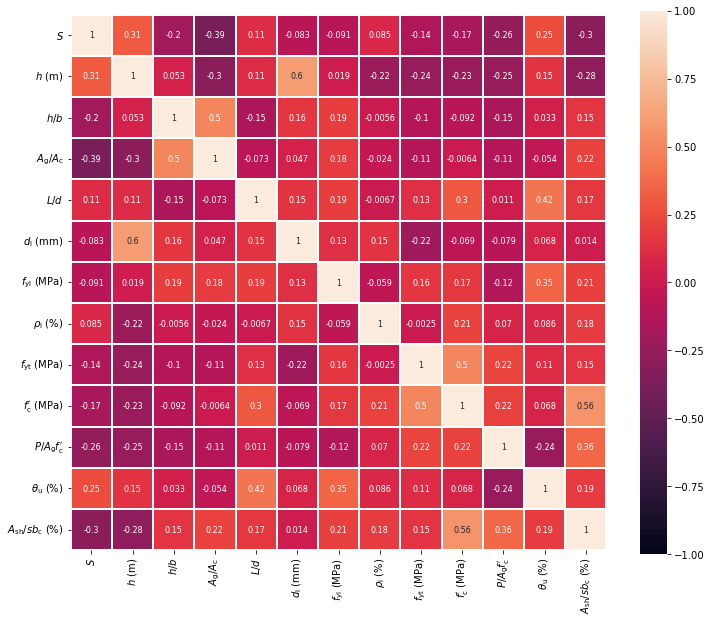

In [3]:
cols = ['S','h', 'h/b', 'Ag/Ac', 'L/d',
        'dl','fyl', 'ρl', 'fyt', 'fc\'',
        'P/Agfc\'', 'θu','Ash/sbc']
data = pd.DataFrame(data,columns = cols)

# Convert American units into international standard units.
data['h']= data['h']*0.0254
data['dl']= data['dl']*0.0254*1000
data['ρl']= data['ρl']*100
data['Ash/sbc']= data['Ash/sbc']*100
data['fyl']= data['fyl']*0.006894757
data['fyt']= data['fyt']*0.006894757
data['fc\'']= data['fc\'']*0.006894757

# Convert variable names to latex formulas
data.columns  = [r'${S}$',
                 r'${h}$ (m)',
                 r'${h/b}$',
                 r'${A_{\rm{g}}/A_{\rm{c}}}$',
                 r'${L/d}$',
                 r'${d_{\rm{l}}}$ (mm)',
                 r'${f_{\rm{yl}}}$ (MPa)',
                 r'${ρ_{\rm{l}}}$ (%)',
                 r'${f_{\rm{yt}}}$ (MPa)',
                 r'${f_{\rm{c}}^\prime}$ (MPa)', 
                 r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$', 
                 r'${θ_{\rm{u}}}$ (%)',
                 r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)']

corr = data.corr() 
print(corr[r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)'].sort_values(ascending=False))  
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0) | (corr <= -0)], vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);

# sns.catplot(y=r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)', kind="box", data=data,palette="Set2")

data.describe()

In [4]:
data = data.drop(r'${h/b}$',axis=1)
data = data.drop(r'${h}$ (m)',axis=1)
data = data.drop(r'${d_{\rm{l}}}$ (mm)',axis=1)
data = data.drop(r'${f_{\rm{yl}}}$ (MPa)',axis=1)
# data = data.drop(r'${ρ_{\rm{l}}}$ (%)',axis=1)

# data['Ag/Ac']= np.log(data['Ag/Ac'])
# data['L/d']= np.log(data['L/d'])
# data['θu (%)']= np.log(data['θu (%)'])
# data['Ash/sbc (%)']= np.log(data['Ash/sbc (%)'])

data.describe()


,${S}$,${A_{\rm{g}}/A_{\rm{c}}}$,${L/d}$,${ρ_{\rm{l}}}$ (%),${f_{\rm{yt}}}$ (MPa),${f_{\rm{c}}^\prime}$ (MPa),${P/A_{\rm{g}}f_{\rm{c}}^\prime}$,${θ_{\rm{u}}}$ (%),${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)
count,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000
mean,0.345382,1.416697,3.934515,2.420284,450.725160,43.082907,0.204809,3.822724,0.709559
std,0.475971,0.296723,1.936086,0.991538,185.566463,24.409750,0.174605,2.420180,0.567173
min,0.000000,1.072619,1.153869,0.460000,199.947953,13.096591,0.000000,0.426720,0.041391
25%,0.000000,1.185629,2.500000,1.822500,351.638321,28.315129,0.092872,1.976377,0.266112
50%,0.000000,1.349330,3.486658,2.224927,413.595788,33.591256,0.158041,3.216300,0.566784
75%,1.000000,1.520312,5.000000,2.681507,475.769156,41.464207,0.298847,5.265612,0.974202
max,1.000000,2.713067,12.500000,6.939707,1423.629425,117.969292,0.899993,15.625000,3.466923


${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)      1.000000
${f_{\rm{c}}^\prime}$ (MPa)          0.560334
${P/A_{\rm{g}}f_{\rm{c}}^\prime}$    0.362295
${A_{\rm{g}}/A_{\rm{c}}}$            0.217613
${θ_{\rm{u}}}$ (%)                   0.185889
${ρ_{\rm{l}}}$ (%)                   0.181681
${L/d}$                              0.165978
${f_{\rm{yt}}}$ (MPa)                0.148452
${S}$                               -0.303374
Name: ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%), dtype: float64


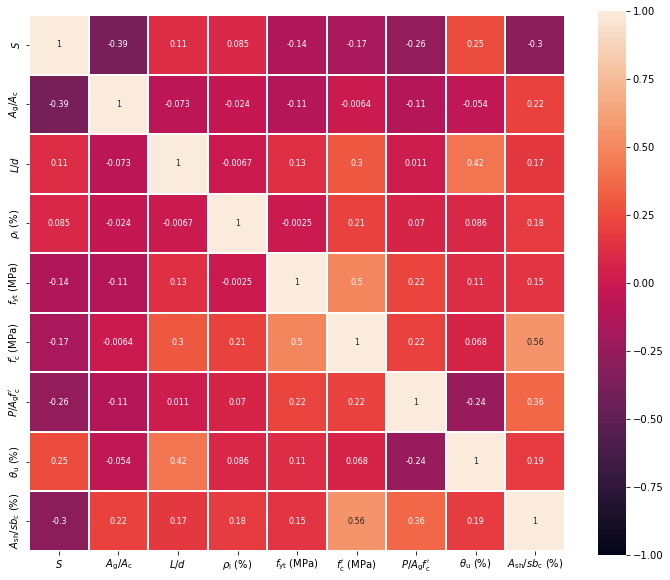

In [5]:
#draw heatmap
corr = data.corr() 
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.0) | (corr <= -0.0)], vmax=1.0, vmin=-1.0, linewidths=0.1,annot=True, annot_kws={"size": 8}, square=True);
print(corr[r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)'].sort_values(ascending=False))  
 


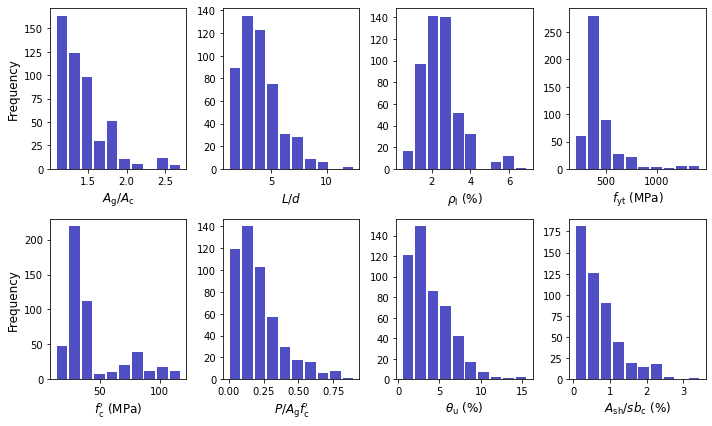

In [6]:
# draw hist
df = data.drop(r'${S}$',axis=1)
#df.hist(bins = 10, figsize=(15,11),grid=False,xlabelsize=10,ylabelsize=10,ax=None,color='#0504aa',alpha=0.7,layout=(3,4),rwidth=0.85)
plt.figure(figsize=(10,6))
nrows=2  #3
ncols=4
n = np.arange(nrows*ncols)+1
for i in n:
    ax = plt.subplot(nrows,ncols,i)
    plt.hist(df.iloc[:,i-1],bins = 10,color='#0504aa',alpha=0.7,rwidth=0.85)
    plt.xlabel(df.columns[i-1],fontsize=12)
    if i%ncols==1:
        plt.ylabel('Frequency',fontsize=12) 
plt.tight_layout()
plt.savefig('Congzhen Xiao, Figure 2, Distribution of input and output variables.tiff',dpi=800)


# sns.pairplot(df,kind='reg', diag_kind='hist')


# Model Fitting

In [7]:
# Draw figure
def Interpretation(model,x):        
    explainer = shap.TreeExplainer(model)          
    shap_values = explainer.shap_values(x)  
    shap_values2 = explainer(x)        

    shap.summary_plot(shap_values, x, show = False)
#     shap.plots.beeswarm(shap_values2,order=shap_values2.abs.max(0), show = False)
    plt.tight_layout()
    plt.savefig('Congzhen Xiao, Figure 4, Global interpretation of XGBoost model.tiff',dpi=800)  
    plt.show()
    shap.summary_plot(shap_values, x, plot_type="bar", show = False)         
#     shap.plots.bar(shap_values2, show = False)
    plt.savefig('GlobalBar.png')        
    plt.show()
    SecShape = ["Rectangular" if shap_values2[i,r'${S}$'].data == 0 else "Circular" for i in range(shap_values2.shape[0])]
    shap.plots.bar(shap_values2.cohorts(SecShape).abs.mean(0), show = False)      
    plt.savefig('SecGlobalBar.png')   
    plt.show()
    shap.plots.bar(shap_values2.cohorts(2).abs.mean(0), show = False)
    plt.savefig('fcGlobalBar.png')   
    plt.show()
#         shap.plots.bar(shap_values2[4], show_data=True)
#         plt.savefig('Individual4.png')         
    shap.plots.waterfall(shap_values2[4], show = False)
    plt.tight_layout()
    plt.savefig('Congzhen Xiao, Figure 5, Individual interpretation for a typical rectangular sample.tiff',dpi=800)  
    plt.show()
    shap.plots.waterfall(shap_values2[467], show = False)
    plt.tight_layout()
    plt.savefig('Congzhen Xiao, Figure 5, Individual interpretation for a typical rectangular sample.tiff',dpi=800)
    plt.show()
    shap.dependence_plot(r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$', shap_values, x,
                         display_features=x,interaction_index=r'${θ_{\rm{u}}}$ (%)', show = False)
    plt.tight_layout()
    plt.savefig('Dependance.png')     
    plt.show()
#         shap.force_plot(explainer.expected_value, shap_values[0,:], x_test.iloc[0,:],matplotlib=True, show = False)      

def DrawECDF(name,TestRatio,y_test):  
    import statsmodels.api as sm 
       
    #draw scatter
    plt.figure(figsize=(6,3))
    plt.scatter(y_test, TestRatio)    
    plt.xlabel(r'Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.ylabel(r'Experimental-Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.title(name)
    plt.tight_layout()
    plt.savefig(name +'scatter2.png')  
    
    plt.figure(figsize=(7,3.5))
    nrows=1
    ncols=2
    # hist
    plt.subplot(nrows,ncols,1)
    plt.hist(TestRatio,bins = 19,color='#0504aa',alpha=0.7,rwidth=0.85)    #range = (-2,2),
    plt.xlabel(r'Experimental-Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.ylabel('Frequency')
#     plt.title('(A)',loc='left')
    plt.tight_layout()

    # ECDF
    plt.subplot(nrows,ncols,2)
    plt.xlim((-1,1))
    plt.ylim((0,1))
    TestEcdf = sm.distributions.ECDF(TestRatio)    
    TestX = np.linspace(min(TestRatio), max(TestRatio))
    TestY =  TestEcdf(TestX)
    plt.plot(TestX, TestY)     
    yq = TestEcdf(0)
    xq = 0
    xx = (xq,xq,-1)
    yy = (0,yq,yq)
    plt.plot(xx, yy, c='k', linewidth=1, linestyle = '-.')    
    print('yq:'+str(yq)[:5])    
    yq = 0.8
    xq = np.quantile(TestRatio, q=yq)
    xx = (xq,xq,-1)
    yy = (0,yq,yq)
    plt.plot(xx, yy, c='k', linewidth=1, linestyle = '--')    
    print('xq:'+str(xq)[:5])        
    plt.legend(['ECDF','Safety probability','80th percentile'], loc = 'upper left')  #guarantee
    plt.tick_params (axis = 'both', which = 'major')
    plt.xlabel(r'Experimental-Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.ylabel('Probability')
#     plt.title('(B)',loc='left')
    plt.tight_layout()
    plt.grid()
    
    plt.savefig('Congzhen Xiao, Figure 7, Distribution of the error between experimental and predicted transverse reinforcement ratio on testing set (A) histogram, and (B) empirical cumulative distribution functio.tiff',dpi=800)    

    
def DrawPDP(model,x):  
    
    #for normal-strength and high-strength concrete
    temp = pd.DataFrame(x)       

    # draw 2D
    features = [r'${f_{\rm{c}}^\prime}$ (MPa)',
                r'${θ_{\rm{u}}}$ (%)',
                r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$' ]
    
    display = plot_partial_dependence(model,temp,features,kind="both",subsample=50,
                                      percentiles=(0.03, 0.97),
                                      grid_resolution=10,random_state=1)
    plt.savefig('Congzhen Xiao, Figure 8, One-way partial dependence plot of transverse reinforcement ratio for normal-strength and high-strength concrete.tiff',dpi=800) 

    # draw 3D
    fig = plt.figure(figsize=(6,4))
    features=(r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$', r'${θ_{\rm{u}}}$ (%)')
    pdp = partial_dependence( model, temp, features=features,percentiles=(0.03, 0.97), kind="average", grid_resolution=10 )
    XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
    Z = pdp.average[0].T
    print('maxZ='+str(np.max(Z))[:4])
    print('minZ='+str(np.min(Z))[:4])
    ax = fig.add_subplot(projection="3d")
    fig.add_axes(ax)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
#     ax.set_zlabel("Partial dependence")
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.savefig('Congzhen Xiao, Figure 9, Two-way partial dependence plot of transverse reinforcement ratio for normal-strength and high-strength concrete.tiff',dpi=800) 

    #for normal-strength concrete
    temp = pd.DataFrame(x)       
    temp = temp.drop(temp[temp[r'${f_{\rm{c}}^\prime}$ (MPa)']>=60].index)

    # draw 2D
    features = [r'${f_{\rm{c}}^\prime}$ (MPa)',
                r'${θ_{\rm{u}}}$ (%)',
                r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$' ]
    
    display = plot_partial_dependence(model,temp,features,kind="both",subsample=50,
                                      percentiles=(0.03, 0.97),
                                      grid_resolution=10,random_state=1)
    plt.savefig('Congzhen Xiao, Figure 10, One-way partial dependence plot of transverse reinforcement ratio for normal-strength concrete.tiff',dpi=800) 
  
    # draw 3D
    fig = plt.figure(figsize=(6,4))
    features=(r'${P/A_{\rm{g}}f_{\rm{c}}^\prime}$', r'${θ_{\rm{u}}}$ (%)')
    pdp = partial_dependence( model, temp, features=features,percentiles=(0.03, 0.97), kind="average", grid_resolution=10 )
    XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
    Z = pdp.average[0].T
    print('maxZ='+str(np.max(Z))[:4])
    print('minZ='+str(np.min(Z))[:4])
    ax = fig.add_subplot(projection="3d")
    fig.add_axes(ax)
    surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor="k")
    ax.set_xlabel(features[0])
    ax.set_ylabel(features[1])
#     ax.set_zlabel("Partial dependence")
    ax.view_init(elev=22, azim=122)
    plt.colorbar(surf)
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.savefig('Congzhen Xiao, Figure 11, Two-way partial dependence plot of transverse reinforcement ratio for normal-strength concrete.tiff',dpi=800) 


OLS
Lasso
Ridge
KNN
SVR
MLP


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


DT
RF
AdaBoost
XGBoost


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


LightGBM
CatBoost


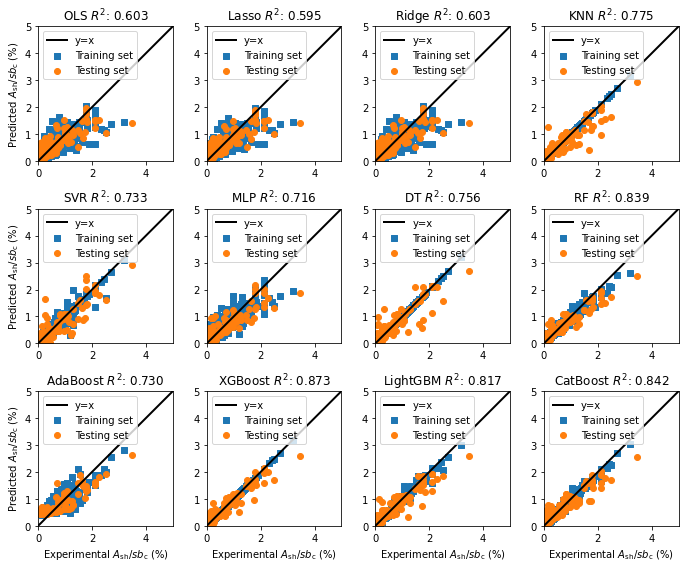

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost
from xgboost import XGBRegressor
import lightgbm 
from lightgbm import LGBMRegressor
import catboost  
from catboost  import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm 

models=[LinearRegression(),Lasso(alpha=0.1),Ridge(alpha=0.1),
        KNeighborsRegressor(),SVR(),
        MLPRegressor(),#alpha=1
        DecisionTreeRegressor(),
        RandomForestRegressor(criterion='absolute_error'),
        AdaBoostRegressor(loss="square"),XGBRegressor(objective="reg:pseudohubererror"),
        LGBMRegressor(),CatBoostRegressor(verbose=False)]
models_str=['OLS','Lasso','Ridge',
            'KNN','SVR',
            'MLP',
            'DT',
            'RF',
            'AdaBoost','XGBoost','LightGBM','CatBoost']

import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import permutation_importance  
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence

import shap
shap.initjs()  

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline 
    
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE
import m2cgen as m2c
import joblib

plt.figure(figsize=(10,8))
nrows=3
ncols=4
TrainR2   =[] 
TrainRMSE =[]
TrainMAE  =[]
TrainMAPE =[]
TrainWMAPE =[] 
TrainMean =[] 
TrainStd =[] 
TrainCOV =[] 
TestR2   =[] 
TestRMSE =[]
TestMAE  =[]
TestMAPE =[]      
TestWMAPE =[]   
TestMean =[] 
TestStd =[] 
TestCOV =[]  
    
x0 = data.drop(r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)',axis=1)
y = data[r'${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)']
x0.columns  = ['S','Ag/Ac', 'L/d', 'ρl', 'fyt', 'fc\'','P/Agfc\'', 'θu']
y.columns   = ['Ash/sbc']

importance = pd.DataFrame(columns = x0.columns)                
i=0
for name,model in zip(models_str,models):
    i=i+1
    model=model     
    print(name)
    if name in ['OLS','Lasso','Ridge','KNN','SVR','MLP']:   
        x = x0
        x = StandardScaler().fit_transform(x)    # MinMaxScaler()
#         x = PCA(n_components=8).fit_transform(x)        
#         x = TruncatedSVD(6).fit_transform(x)
#         x = LDA(n_components=6).fit_transform(x, y)
#         x = TSNE(n_components=2).fit_transform(x)
        x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state = 1) #stratify=x['SecShape']
    
        # Optimization of the model hyper-parameters
#         if name in ['Ridge']:
#             param_grid={'alpha': np.logspace(-3, 4, 100)}      
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['Lasso']:
#             param_grid={'alpha': np.logspace(-3, 4, 100)}   
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['KNN']:   
#             param_grid = {'weights':['uniform','distance'], 'n_neighbors':[k for k in range(1,8)]}       
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['SVR']:   
#             param_grid = {'C': [ 0.01,0.1, 1, 100, 1000],
#                            'epsilon': [ 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
#                            'gamma': [ 0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['MLPRegressor']:      
#             param_grid = {'hidden_layer_sizes': [(50,50,50), (20,20,20)],         
#                           'activation': ['relu','tanh','logistic'],
#                           'alpha': [0.0001, 0.05],
#                           'learning_rate': ['constant','adaptive'],
#                           'solver': ['adam']}
            
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 

        # Model training
#         if name in ['Ridge']:
#             model = Ridge(alpha=64.28)   #{'alpha': 64.28073117284319}         
        if name in ['Lasso']:
            model = Lasso(alpha=0.006)   #{'alpha': 0.005994842503189409}
        if name in ['KNN']:   
            model = KNeighborsRegressor(n_neighbors=2,weights='distance')  # {'n_neighbors': 2, 'weights': 'distance'}
        if name in ['SVR']:   
            model = SVR(C=100,epsilon=0.05,gamma=0.1)  # {'C': 100, 'epsilon': 0.05, 'gamma': 0.1}
#         if name in ['DecisionTree']:   
#             #{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 0.005}
#              model = DecisionTreeRegressor(max_depth=9,min_samples_leaf=5,min_samples_split=0.005)  
#         if name in ['MLPRegressor']:      
#             model = MLPRegressor()


    else:
        x = x0
        x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2,random_state = 1) #stratify=x['SecShape']
        # Optimization of the model hyper-parameters
#         if name in ['DecisionTree']:   
#             param_grid = {'max_depth': [3,6,9],
#                           'min_samples_leaf': [5,50,100],
#                           'min_samples_split': [ 0.0001, 0.001, 0.005, 0.1, 1, 3, 5]}     
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
            
#         if name in ['RandomForest']:      
# #             max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# #             max_depth.append(None)
# #             param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
# #                            'max_features': ['auto', 'sqrt'],
# #                            'max_depth': max_depth,
# #                            'min_samples_split': [2, 5, 10],
# #                            'min_samples_leaf': [1, 2, 4],
# #                            'bootstrap': [True, False]}
# #             grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 10, 
# #                                             verbose=2, random_state=42, n_jobs = -1)
#             param_grid = {'bootstrap': [True],
#                           'max_depth': [80, 90, 100, 110],
#                           'max_features': [2, 3],
#                           'min_samples_leaf': [3, 4, 5],
#                           'min_samples_split': [8, 10, 12],
#                           'n_estimators': [100, 200, 300, 1000]}       
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['AdaBoost']:   
#             param_grid = {'n_estimators': [50,100,150,200,250],
#                           'learning_rate': np.linspace(0.1, 1, 10)}     
#             grid_search = GridSearchCV(model,param_grid=param_grid, cv=10)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_) 
#         if name in ['XGBoost']:   
#             param_grid = {'n_estimators': [550, 575, 600, 650, 675],
#                           'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 
#                           'min_child_weight': [1, 2, 3, 4, 5, 6],
#                           'subsample': [0.6, 0.7, 0.8, 0.9],
#                           'colsample_bytree': [0.6, 0.7, 0.8, 0.9],
#                           'reg_alpha': [0.05, 0.1, 1, 2, 3], 
#                           'reg_lambda': [0.05, 0.1, 1, 2, 3],
#                           'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2]}  
#             grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 10, 
#                                              verbose=2, random_state=42, n_jobs = -1)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_)                                  
#         if name in ['LightGBM']:   
#             param_grid =  {'n_estimators': [1000, 1500, 2000, 2500],
#                'max_depth':  [4, 5, 8, -1],
#                'num_leaves': [15, 31, 63, 127],
#                'subsample': [0.6, 0.7, 0.8, 1.0],
#                'colsample_bytree': [0.6, 0.7, 0.8, 1.0],
#                'learning_rate' : [0.01,0.02,0.03]
#               }
#             grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 10, 
#                                              verbose=2, random_state=42, n_jobs = -1)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_)    
#         if name in ['CatBoost']:   
#             param_grid = {'depth':[3,1,2,6,4,5,7,8,9,10],                        
#                           'iterations':[250,100,500,1000],
#                           'learning_rate':[0.03,0.001,0.01,0.1,0.2,0.3],
#                           'l2_leaf_reg':[3,1,5,10,100]}
#             grid_search = RandomizedSearchCV(estimator = model, param_distributions = param_grid, n_iter = 100, cv = 10, 
#                                              verbose=2, random_state=42, n_jobs = -1)
#             grid_search.fit(x_train, y_train)
#             model = grid_search.best_estimator_
#             print(name)
#             print(grid_search.best_params_)            
      
    

        # Model training
#         if name in ['DecisionTree']:   
#             #{'max_depth': 9, 'min_samples_leaf': 5, 'min_samples_split': 3}
#             model = DecisionTreeRegressor(max_depth=9,min_samples_leaf=5,min_samples_split=3)            
#         if name in ['RandomForest']:        
#             #{'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 200}
#             model = RandomForestRegressor(n_estimators= 200, min_samples_split=8 , min_samples_leaf= 3, 
#                                           max_features= 'sqrt', max_depth=110,bootstrap= 'True')
#         if name in ['AdaBoost']:   
#             #{'learning_rate': 0.2, 'n_estimators': 50}
#             model = AdaBoostRegressor(learning_rate=0.2,n_estimators=50)   
#         if name in ['XGBoost']:   
#             #{'subsample': 0.6, 'reg_lambda': 3, 'reg_alpha': 0.1, 'n_estimators': 675, 
#             #'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
#             model = XGBRegressor(subsample=0.6,n_estimators=675,reg_lambda=3,reg_alpha=0.1,
#                                  min_child_weight=2,max_depth=5,learning_rate=0.05,colsample_bytree=0.8)             
        if name in ['LightGBM']:   
            #{'subsample': 0.9, 'num_leaves': 7, 'n_estimators': 675, 'max_depth': 5, 'learning_rate': 0.1}
            model = LGBMRegressor(learning_rate=0.03,n_estimators=2500,subsample=0.6,num_leaves=63,max_depth=4,colsample_bytree=0.6) 
            #,                                  objective='regression_l1',metric='mae'
#         if name in ['CatBoost']:   
#             #{'learning_rate': 0.2, 'l2_leaf_reg': 1, 'iterations': 1000, 'depth': 7}
#             model = CatBoostRegressor(learning_rate=0.2,l2_leaf_reg=10,iterations=1000,depth=7) 

#         if name in ['XGBoost','LightGBM']:   
#             eval_set = [(x_train,y_train),(x_test, y_test)]
#             model.fit(x_train, y_train, early_stopping_rounds=100,eval_metric="mape", eval_set=eval_set, verbose=True)
#         else:
#             model.fit(x_train, y_train) 
            
    model.fit(x_train, y_train) 
    y_train_pred = model.predict(x_train)      
    y_test_pred = model.predict(x_test)      
        
    if name in ['XGBoost']:
        code = m2c.export_to_c(model)# transform into C code
        fh = open( name+'.cpp', 'w', encoding='utf-8')
        fh.write(code)
        fh.close()
        joblib.dump(model, name+'.pkl') #save model

              

    y_test_pred[y_test_pred < 0] = 0
    # Evaluation of the model performance
    r2 = r2_score(y_train, y_train_pred)
    TrainR2.append(str(r2)[:5])   
    mse = mean_squared_error(y_train, y_train_pred)
    rmse = sqrt(mse)
    TrainRMSE.append(str(rmse)[:5])  
    mae = mean_absolute_error(y_train, y_train_pred)
    TrainMAE.append(str(mae)[:5])   
    mape = mean_absolute_percentage_error(y_train, y_train_pred)
    TrainMAPE.append(str(mape)[:5])   
    wmape = sum(abs(y_train_pred.ravel() - y_train.ravel())) / sum(abs(y_train.ravel()))
    TrainWMAPE.append(str(wmape)[:5])     
#     TrainRatio = y_train.ravel()-y_train_pred.ravel()
#     mean = TrainRatio.mean()
#     TrainMean.append(str(mean)[:5]) 
#     std = TrainRatio.std()
#     TrainStd.append(str(std)[:5])  
#     delta = std/mean
#     TrainCOV.append(str(delta)[:5])    
    
    r2 = r2_score(y_test, y_test_pred)
    TestR2.append(str(r2)[:5])           
    mse = mean_squared_error(y_test,y_test_pred)
    rmse = sqrt(mse)
    TestRMSE.append(str(rmse)[:5])  
    mae = mean_absolute_error(y_test,y_test_pred)
    TestMAE.append(str(mae)[:5])   
    mape = mean_absolute_percentage_error(y_test,y_test_pred)
    TestMAPE.append(str(mape)[:5])   
    wmape = sum(abs(y_test_pred.ravel() - y_test.ravel())) / sum(abs(y_test.ravel()))
    TestWMAPE.append(str(wmape)[:5])   
    TestRatio = y_test.ravel()-y_test_pred.ravel()
    mean = TestRatio.mean()
    TestMean.append(str(mean)[:5]) 
    std = TestRatio.std()
    TestStd.append(str(std)[:5]) 
    delta = std/mean
    TestCOV.append(str(delta)[:5])   
       

            
    #draw scatter
    plt.subplot(nrows,ncols,i) 
    lim=int(max(y)+2)
    xx = np.linspace(0, lim, 10)
    yy = xx       
    plt.plot(xx, yy, c='k', linewidth=2)
    plt.scatter(y_train, y_train_pred, marker='s')
    plt.scatter(y_test, y_test_pred, marker='o')
    plt.legend(['y=x', 'Training set', 'Testing set'], loc = 'upper left')
    plt.tick_params (axis = 'both', which = 'major')
    plt.axis('square')
    if i>8:
        plt.xlabel(r'Experimental ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    if i%ncols==1:
        plt.ylabel(r'Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.xlim((0,lim))
    plt.ylim((0,lim))
    plt.title(name +r' ${R^2}$: '+str(r2)[:5])
    plt.tight_layout()
plt.savefig('Congzhen Xiao, Figure 3, Comparison of predicted and experimental transverse reinforcement ratio.tiff',dpi=800) 

    #Interpretation of model results
#     if name in ['XGBoost']:   
#         Interpretation(model,x)   
#         DrawECDF(name,TestRatio,y_test_pred)        
#         DrawPDP(model,x)

    # print importance  
#     r = permutation_importance(model, x, y,n_repeats=10,random_state=0)
#     s1 = pd.Series(r.importances_mean,index = importance.columns)
#     importance = importance.append(s1,ignore_index=True)
    
#     print(name+' permutation_importance: '+str(r2)[:5])
#     for i in r.importances_mean.argsort()[::-1]:
#         if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#             print(f"    {importance.columns.values.tolist()[i]:<16}"
#                   f"{r.importances_mean[i]:.3f}"
#                   f" +/- {r.importances_std[i]:.3f}")
      


In [12]:
importance.head(14)

,S,Ag/Ac,L/d,ρl,fyt,fc',P/Agfc',θu


In [13]:
accuray_stats=pd.DataFrame({'model':models_str,
                            'TrainR2':TrainR2,'TrainRMSE':TrainRMSE,'TrainMAE':TrainMAE,'TrainWAPE':TrainWMAPE,'TrainMAPE':TrainMAPE,
#                             'TrainMean':TrainMean,'TrainStd':TrainStd,
                            'TestR2':TestR2,'TestRMSE':TestRMSE,'TestMAE':TestMAE,'TestWAPE':TestWMAPE,'TestMAPE':TestMAPE,
                            'TestMean':TestMean,'TestStd':TestStd})
accuray_stats.head(14)

,model,TrainR2,TrainRMSE,TrainMAE,TrainWAPE,TrainMAPE,TestR2,TestRMSE,TestMAE,TestWAPE,TestMAPE,TestMean,TestStd
0,OLS,0.534,0.365,0.268,0.384,0.710,0.603,0.423,0.297,0.391,0.926,0.038,0.421
1,Lasso,0.533,0.366,0.267,0.384,0.719,0.595,0.427,0.300,0.395,0.945,0.040,0.425
2,Ridge,0.534,0.365,0.268,0.384,0.710,0.603,0.423,0.297,0.391,0.926,0.038,0.421
3,KNN,1.0,0.0,0.0,0.0,0.0,0.775,0.318,0.194,0.256,0.424,0.064,0.311
4,SVR,0.941,0.129,0.075,0.108,0.175,0.733,0.347,0.233,0.307,0.590,0.047,0.343
5,MLP,0.746,0.270,0.190,0.272,0.422,0.716,0.357,0.240,0.316,0.610,0.068,0.351
6,DT,1.0,5.736,7.671,1.100,2.399,0.756,0.331,0.189,0.249,0.623,0.007,0.331
7,RF,0.952,0.116,0.078,0.112,0.181,0.839,0.269,0.189,0.249,0.524,0.030,0.267
8,AdaBoost,0.636,0.323,0.282,0.404,0.968,0.730,0.349,0.297,0.392,1.211,-0.05,0.345
9,XGBoost,0.999,0.006,0.004,0.006,0.009,0.873,0.239,0.161,0.212,0.477,0.006,0.239


## Comparisons with empirical formula

In [14]:
def Watson(x,y_pred):
    for i in range(len(y_pred)):        
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        m = x['fyl'].iat[i]/0.85/x['fc\''].iat[i]
        n = x['P/Agfc\''].iat[i]*1.35
        temp = x['ρl'].iat[i]/100*m
        if (temp>0.4):
            temp=0.4
        y = AgAc*(x['μΦ'].iat[i]-33*temp+22)/111*x['fc\''].iat[i]/x['fyt'].iat[i]*n/0.85-0.006
        y_pred.iat[i] = y*100
        
def NZS3101(x,y_pred):
    for i in range(len(y_pred)):        
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        m = x['fyl'].iat[i]/0.85/x['fc\''].iat[i]
        n = x['P/Agfc\''].iat[i]*1.35
        temp = x['ρl'].iat[i]/100*m
        if (temp>0.4):
            temp=0.4
        y = AgAc*(1.3-temp)/3.3*x['fc\''].iat[i]/x['fyt'].iat[i]*n/0.85-0.006  # *1.35
        temp=x['ρl'].iat[i]/100*h*b/96/x['dl'].iat[i]/bc
        if (y<temp):
            y=temp
        y_pred.iat[i] = y*100
        
def ACI318(x,y_pred):
    for i in range(len(y_pred)):     
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        AgAc = x['Ag/Ac'].iat[i]
        if (x['S'].iat[i] ==0): #rect
            y = 0.09*x['fc\''].iat[i]/x['fyt'].iat[i]
            y1= 0.3*x['fc\''].iat[i]/x['fyt'].iat[i]*(AgAc-1)
            y=max(y,y1)
        else:
            y = 0.12*x['fc\''].iat[i]/x['fyt'].iat[i]
        y_pred.iat[i] = y*100 
        
def Sheikh(x,y_pred):
    for i in range(len(y_pred)):        
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        m = x['fyl'].iat[i]/0.85/x['fc\''].iat[i]
        c = 0.85*(1-x['ρl'].iat[i]/100)+x['ρl'].iat[i]/100*x['fyl'].iat[i]/x['fc\''].iat[i]
        n = x['P/Agfc\''].iat[i]*1.4
        n = n/c
        if (x['S'].iat[i] ==0): #rect
            y = 0.09*x['fc\''].iat[i]/x['fyt'].iat[i]
            y1= 0.3*x['fc\''].iat[i]/x['fyt'].iat[i]*(AgAc-1)
            y=max(y,y1)
        else:
            y = 0.12*x['fc\''].iat[i]/x['fyt'].iat[i]
        y = y*(1+13*pow(n,5))*pow(x['μΦ'].iat[i],1.15)/29
        y_pred.iat[i] = y*100
        
def Ghannoum(x,y_pred):
    for i in range(len(y_pred)):        
        VyVo = x['Vp1/Vo1'].iat[i]        
        n = x['P/Agfc\''].iat[i]
        a = (x['θu'].iat[i]-x['θy'].iat[i])/100
        if (x['S'].iat[i] ==0): #rect
            y = (a-0.042+0.043*n+0.023*VyVo)/0.63
        else:
            y = (a-0.06+0.058*n+0.037*VyVo)/1.3
       # y = max(y,0.0175)
        y_pred.iat[i] = y*100 



        
def EuroCode8(x,y_pred):
    for i in range(len(y_pred)):        
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        hc = (h-2*x['cc'].iat[i])
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        m = x['fyl'].iat[i]/0.85/x['fc\''].iat[i]
        n = x['Pd/Agfcd'].iat[i]/1.3*1.43
        E = 200000
        epsl_y = x['fyl'].iat[i]/1.1/E
        mu = 6.8  #1.3*4.5*2/3*2-1
#         mu = x['μΦ'].iat[i]
        s = x['s'].iat[i]
        a_s = (1-s/2/(b-2*x['cc'].iat[i]))*(1-s/2/(h-2*x['cc'].iat[i]))
        wi = bc/3
        a_n = 1-9*wi*wi/6/bc/hc
        a = a_s*a_n
        y = (30*mu*n*epsl_y*b/bc-0.035)/a
        if(y<0.12):
            y=0.12
        y = y*data['fcd/fyd'].iat[i]
        y_pred.iat[i] = y*100/2
    
def QianJiaru(x,y_pred):
    for i in range(len(y_pred)):       
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        n = x['Pd/Agfcd'].iat[i]
        y = (21.4*x['θu'].iat[i]/100*(n+0.17)/(1+0.05*x['L/d'].iat[i])-0.04)
        if(y<0.05):
            y=0.05
        y = y*data['fcd/fyd'].iat[i]
        y_pred.iat[i] = y*100/2

        
def LvXilin(x,y_pred):
    for i in range(len(y_pred)):       
        h = x['h'].iat[i]
        b = x['h'].iat[i]/x['h/b'].iat[i]
        bc = (b-2*x['cc'].iat[i])
        AgAc = x['Ag/Ac'].iat[i]
        n = x['Pd/Agfcd'].iat[i]
        y = (20*AgAc*n*x['θu'].iat[i]/100-0.04)
        if(y<0.05):
            y=0.05
        y = y*data['fcd/fyd'].iat[i]
        y_pred.iat[i] = y*100/2


def GB50010(x,y_pred):
    for i in range(len(y_pred)):       
        n = x['Pd/Agfcd'].iat[i]
        temp=0
        if(n<=0.1):
            temp=0.1
        elif(n<=0.2):
            temp=0.1
        elif(n<=0.3):
            temp=0.1
        elif(n<=0.4):
            temp=0.11
        elif(n<=0.5):
            temp=0.13
        elif(n<=0.6):
            temp=0.15
        elif(n<=0.7):
            temp=0.17
        elif(n<=0.8):
            temp=0.2
        elif(n<=0.9):
            temp=0.23
        elif(n<=1.0):
            temp=0.25
       
        y = temp*data['fcd/fyd'].iat[i]
        if(y<0.008):
            y=0.008
        y_pred.iat[i] = y*100/2


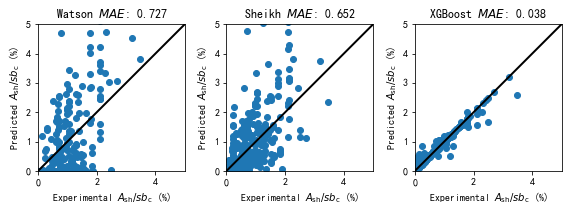

In [15]:
from __future__ import print_function 
import os
import numpy as np
from numpy import concatenate
import pandas as pd  
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
import seaborn as sns
from math import sqrt

# 正常显示中文
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 正常显示符号
from matplotlib import rcParams
rcParams['axes.unicode_minus']=False


data = pd.read_excel('columnACI.xlsx', sheet_name='Database')
data.head()
data['Ag/Ac'] = data['h']*data['h']/data['h/b'] /(data['h']-2*data['cc'])/(data['h']/data['h/b']-2*data['cc'])
data['Ash/sbc'] = data['ρt']*data['h']/data['h/b']/(data['h']/data['h/b']-2*data['cc'])
data['lp/l'] = 0.08+6*data['dl']/data['L']
data['μΦ'] = (data['θu']/data['θy']-1)/3/data['lp/l']/(1-0.5*data['lp/l'])+1
data['Pd/Agfcd'] = data['P/Agfc\'']*0.8*1.4/(0.88*0.76)*1.3   # *1.3
data['fcd/fyd'] = data['fc\'']/0.8*0.88*0.76/1.4/(data['fyt']/1.1) 

# Convert American units into international standard units.
data['h']= data['h']*0.0254
data['dl']= data['dl']*0.0254
data['cc']= data['cc']*0.0254
data['s']= data['s']*0.0254
data['ρl']= data['ρl']*100
data['Ash/sbc']= data['Ash/sbc']*100
data['fyl']= data['fyl']*0.006894757
data['fyt']= data['fyt']*0.006894757
data['fc\'']= data['fc\'']*0.006894757

data=data.dropna()
x = data.drop('Ash/sbc',axis=1)
y = data['Ash/sbc']

models_str=['Watson','Sheikh','XGBoost']  
# models_str=['GB 50010-2010(一级)','ACI 318-11','NZS 3101-06','Euro Code 8(DCH)','Watson','Sheikh','钱镓茹','吕西林','ML']

TrainR2   =[] 
TrainRMSE =[]
TrainMAE  =[]
TrainMAPE =[]
TrainWMAPE =[] 
TrainMean =[] 
TrainStd =[] 
TrainCOV =[] 
TestR2   =[] 
TestRMSE =[]
TestMAE  =[]
TestMAPE =[]      
TestWMAPE =[]   
TestMean =[] 
TestStd =[] 
TestCOV =[]  

plt.figure(figsize=(8,3))
nrows=1
ncols=3
# plt.figure(figsize=(10,8))
# nrows=3  
# ncols=4

i=0
# Son=['(A)','(B)']
for name in models_str:    
    i=i+1
    y_pred = y.copy(deep=True) 
    if name in ['XGBoost']:   
        cols = ['S','Ag/Ac', 'L/d', 'ρl', 'fyt', 'fc\'','P/Agfc\'', 'θu']
        x_test = pd.DataFrame(x,columns = cols)
        model = joblib.load('XGBoost.pkl')
        y_pred = model.predict(x_test)      
    elif name in ['Watson']:   
        Watson(x,y_pred)          
    elif name in ['ACI 318-11']:  
        ACI318(x,y_pred)     
    elif name in ['Sheikh']:   
        Sheikh(x,y_pred)     
    elif name in ['Ghannoum']:
        Ghannoum(x,y_pred)        
    elif name in ['GB 50010-2010(一级)','GB 50010-2010']:   
        GB50010(x,y_pred)          
    elif name in ['Euro Code 8(DCH)']:   
        EuroCode8(x,y_pred)     
    elif name in ['NZS 3101-06']:
        NZS3101(x,y_pred)          
    elif name in ['钱镓茹']:          
        QianJiaru(x,y_pred)     
    elif name in ['吕西林']:
        LvXilin(x,y_pred)              
        
    y_pred[y_pred < 0] = 0         

   # Evaluation of the model performance    
    r2 = r2_score(y, y_pred)
    TestR2.append(str(r2)[:5])           
    mse = mean_squared_error(y,y_pred)
    rmse = sqrt(mse)
    TestRMSE.append(str(rmse)[:5])  
    mae = mean_absolute_error(y,y_pred)
    TestMAE.append(str(mae)[:5])   
    mape = mean_absolute_percentage_error(y,y_pred)
    TestMAPE.append(str(mape)[:5])   
    wmape = sum(abs(y_pred.ravel() - y.ravel())) / sum(abs(y.ravel()))
    TestWMAPE.append(str(wmape)[:5])   
    
    TestRatio = y.ravel()-y_pred.ravel()
    mean = TestRatio.mean()
    TestMean.append(str(mean)[:5]) 
    std = TestRatio.std()
    TestStd.append(str(std)[:5]) 
    delta = std/mean
    TestCOV.append(str(delta)[:5])   
    
    #draw scatter
    plt.subplot(nrows,ncols,i)
    lim=int(max(y)+2)
    xx = np.linspace(0, lim, 10)
    yy = xx
    plt.plot(xx, yy, c='k', linewidth=2)
    plt.scatter(y, y_pred, marker='o')
    plt.tick_params (axis = 'both', which = 'major')
    plt.axis('square')
    plt.xlabel(r'Experimental ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.ylabel(r'Predicted ${A_{\rm{sh}}/sb_{\rm{c}}}$ (%)')
    plt.xlim((0,lim))
    plt.ylim((0,lim))
#     plt.title(Son[i-1],loc='left') #loc='left',x=1,y=0
    plt.title(name +r' ${MAE}$: '+str(mae)[:5])
    plt.tight_layout()    
plt.savefig('Congzhen Xiao, Figure 6, Comparison of predicted and experimental transverse reinforcement ratio.tiff',dpi=800)    

#     DrawECDF(name,TestRatio,y_test)

In [16]:
accuray_stats=pd.DataFrame({'model':models_str,                          
                            'R2':TestR2,'RMSE':TestRMSE,'MAE':TestMAE,'MAPE':TestMAPE,'WAPE':TestWMAPE,
                            'ErrorMean':TestMean,'ErrorStd':TestStd})
accuray_stats.head(14)

,model,R2,RMSE,MAE,MAPE,WAPE,ErrorMean,ErrorStd
0,Watson,-1.65,0.996,0.727,0.972,0.869,0.109,0.990
1,Sheikh,-3.57,1.308,0.652,0.862,0.779,-0.20,1.291
2,XGBoost,0.964,0.115,0.038,0.099,0.046,0.002,0.115
